In [87]:
import queuing as q
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.dpi'] = 300

OUTPUT_FOLDER = "./results/"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [88]:
minSamples = 100
maxSamples = 100000
SEED = 42
targetSTD = 0.01
MU = 1
RHO = np.linspace(0.5, 0.95, 46)

# 2. Effect of $\rho = \frac{\lambda}{n\mu}$ on attaining target standard deviation

In [ ]:
for N_SERVER in [1, 2, 4]:
    
    list, stds = [], []

    for i in RHO:
        LAMBDA = i * N_SERVER * MU
        l, s = q.experiment(N_SERVER, LAMBDA, q.markovTimeDist(MU), minSamples, maxSamples, SEED, targetSTD, "F", False)
        list.append(l)
        stds.append(s)

    q.saveTxt(OUTPUT_FOLDER + f"M_M_{N_SERVER}", list)

In [ ]:
# fig, ax = plt.subplots(2, 1, figsize=(4, 10))
# ax[0].plot(RHO, [len(l) for l in list])
# ax[1].plot(RHO, stds)
# plt.show()

# 3. Shortest job first scheduling

In [ ]:
N_SERVER = 1

In [ ]:
list, stds = [], []

for i in RHO:
    LAMBDA = i * N_SERVER * MU
    l, s = q.experiment(N_SERVER, LAMBDA, q.markovTimeDist(MU), minSamples, maxSamples, SEED, targetSTD, "T", False)
    list.append(l)
    stds.append(s)

q.saveTxt(OUTPUT_FOLDER + f"M_M_{N_SERVER}_shortest_job_first", list)

# 4. Different service rate distributions

## Deterministic distribution

In [ ]:
tInter = 1

In [ ]:
for N_SERVER in [1, 2, 4]:
    
    list, stds = [], []

    for i in RHO:
        LAMBDA = i * N_SERVER * MU
        l, s = q.experiment(N_SERVER, LAMBDA, q.deterministicTimeDist(tInter), minSamples, maxSamples, SEED, targetSTD, "F", False)
        list.append(l)
        stds.append(s)

    q.saveTxt(OUTPUT_FOLDER + f"M_D_{N_SERVER}", list)

## Hyperexponential longtail-distribution

In [ ]:
rateA = 1.0
rateB = 5.0
probA = 0.75

MU = rateA * probA + rateB * (1 - probA) # Time average rate

In [ ]:
for N_SERVER in [1, 2, 4]:
    
    list, stds = [], []
    
    for i in RHO:
        LAMBDA = i * N_SERVER * MU
        l, s = q.experiment(N_SERVER, LAMBDA, q.longtailHyperexponentialDist(rateA, rateB, probA), minSamples, maxSamples, SEED, targetSTD, "F", False)
        list.append(l)
        stds.append(s)

    q.saveTxt(OUTPUT_FOLDER + f"M_H_{N_SERVER}", list)

# Loading results

In [95]:
list_M_M_1 = q.readTxt(OUTPUT_FOLDER + "M_M_1")
list_M_M_2 = q.readTxt(OUTPUT_FOLDER + "M_M_2")
list_M_M_4 = q.readTxt(OUTPUT_FOLDER + "M_M_4")

list_M_M_1_shortest_job_first = q.readTxt(OUTPUT_FOLDER + "M_M_1_shortest_job_first")

list_M_D_1 = q.readTxt(OUTPUT_FOLDER + "M_D_1")
list_M_D_2 = q.readTxt(OUTPUT_FOLDER + "M_D_2")
list_M_D_4 = q.readTxt(OUTPUT_FOLDER + "M_D_4")

list_M_H_1 = q.readTxt(OUTPUT_FOLDER + "M_H_1")
list_M_H_2 = q.readTxt(OUTPUT_FOLDER + "M_H_2")
list_M_H_4 = q.readTxt(OUTPUT_FOLDER + "M_H_4")

list_M_H_1_CorrectRate = q.readTxt(OUTPUT_FOLDER + "M_H_1_CorrectRate")
list_M_H_2_CorrectRate = q.readTxt(OUTPUT_FOLDER + "M_H_2_CorrectRate")
list_M_H_4_CorrectRate = q.readTxt(OUTPUT_FOLDER + "M_H_4_CorrectRate")

list_M_H_1_TestRate = q.readTxt(OUTPUT_FOLDER + "M_H_1_TestRate")
list_M_H_2_TestRate = q.readTxt(OUTPUT_FOLDER + "M_H_2_TestRate")
list_M_H_4_TestRate = q.readTxt(OUTPUT_FOLDER + "M_H_4_TestRate")

In [96]:
stds_M_M_1 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_M_1]
stds_M_M_2 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_M_2]
stds_M_M_4 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_M_4]

means_M_M_1 = [np.mean(samples) for samples in list_M_M_1]
means_M_M_2 = [np.mean(samples) for samples in list_M_M_2]
means_M_M_4 = [np.mean(samples) for samples in list_M_M_4]

stds_M_M_1_shortest_job_first = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_M_1_shortest_job_first]

means_M_M_1_shortest_job_first = [np.mean(samples) for samples in list_M_M_1_shortest_job_first]

stds_M_D_1 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_D_1]
stds_M_D_2 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_D_2]
stds_M_D_4 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_D_4]

means_M_D_1 = [np.mean(samples) for samples in list_M_D_1]
means_M_D_2 = [np.mean(samples) for samples in list_M_D_2]
means_M_D_4 = [np.mean(samples) for samples in list_M_D_4]

stds_M_H_1 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_1]
stds_M_H_2 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_2]
stds_M_H_4 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_4]

means_M_H_1 = [np.mean(samples) for samples in list_M_H_1]
means_M_H_2 = [np.mean(samples) for samples in list_M_H_2]
means_M_H_4 = [np.mean(samples) for samples in list_M_H_4]

stds_M_H_1_CorrectRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_1_CorrectRate]
stds_M_H_2_CorrectRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_2_CorrectRate]
stds_M_H_4_CorrectRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_4_CorrectRate]

means_M_H_1_CorrectRate = [np.mean(samples) for samples in list_M_H_1_CorrectRate]
means_M_H_2_CorrectRate = [np.mean(samples) for samples in list_M_H_2_CorrectRate]
means_M_H_4_CorrectRate = [np.mean(samples) for samples in list_M_H_4_CorrectRate]

stds_M_H_1_TestRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_1_TestRate]
stds_M_H_2_TestRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_2_TestRate]
stds_M_H_4_TestRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_4_TestRate]

means_M_H_1_TestRate = [np.mean(samples) for samples in list_M_H_1_TestRate]
means_M_H_2_TestRate = [np.mean(samples) for samples in list_M_H_2_TestRate]
means_M_H_4_TestRate = [np.mean(samples) for samples in list_M_H_4_TestRate]

# Plots

## M/M/n queues

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[0][0].plot(RHO, [len(l) for l in list_M_M_1])
ax[1][0].plot(RHO, stds_M_M_1)
ax[2][0].plot(RHO, means_M_M_1)
ax[0][1].plot(RHO, [len(l) for l in list_M_M_2])
ax[1][1].plot(RHO, stds_M_M_2)
ax[2][1].plot(RHO, means_M_M_2)
ax[0][2].plot(RHO, [len(l) for l in list_M_M_4])
ax[1][2].plot(RHO, stds_M_M_4)
ax[2][2].plot(RHO, means_M_M_4)

ax[0][0].set_title(r"$n=1$", fontsize=14)
ax[0][1].set_title(r"$n=2$", fontsize=14)
ax[0][2].set_title(r"$n=4$", fontsize=14)

ax[0][0].set_ylabel("Number of Measurements", fontsize=12)
ax[1][0].set_ylabel("Standard Deviation", fontsize=12)
ax[2][0].set_ylabel("Mean Waiting Time", fontsize=12)

ax[2][0].set_xlabel(r"$\rho$", fontsize=12)
ax[2][1].set_xlabel(r"$\rho$", fontsize=12)
ax[2][2].set_xlabel(r"$\rho$", fontsize=12)

for i in range(3):
    for j in range(3):
        ax[i][j].grid(True)

row_0_ymin = min(ax[0][i].get_ylim()[0] for i in range(3))
row_0_ymax = max(ax[0][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[0][i].set_ylim(row_0_ymin, row_0_ymax)

row_1_ymin = min(ax[1][i].get_ylim()[0] for i in range(3))
row_1_ymax = max(ax[1][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[1][i].set_ylim(row_1_ymin, row_1_ymax)

row_2_ymin = min(ax[2][i].get_ylim()[0] for i in range(3))
row_2_ymax = max(ax[2][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[2][i].set_ylim(row_2_ymin, row_2_ymax)

#fig.suptitle("M/M/n queues", fontsize=16)

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_M_1], label="n=1")
ax.plot(RHO, [len(l) for l in list_M_M_2], label="n=2")
ax.plot(RHO, [len(l) for l in list_M_M_4], label="n=4")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 101000)
ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_M_1, label="n=1")
ax.plot(RHO, means_M_M_2, label="n=2")
ax.plot(RHO, means_M_M_4, label="n=4")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 18)
ax.legend()

plt.show()

## Shortest job first scheduling

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
ax[0][0].plot(RHO, [len(l) for l in list_M_M_1])
ax[1][0].plot(RHO, stds_M_M_1)
ax[2][0].plot(RHO, means_M_M_1)
ax[0][1].plot(RHO, [len(l) for l in list_M_M_1_shortest_job_first])
ax[1][1].plot(RHO, stds_M_M_1_shortest_job_first)
ax[2][1].plot(RHO, means_M_M_1_shortest_job_first)

ax[0][0].set_title("without shortest job first scheduling")
ax[0][1].set_title("with shortest job first scheduling")

ax[0][0].set_ylabel("Number of Measurements", fontsize=12)
ax[1][0].set_ylabel("Standard Deviation", fontsize=12)
ax[2][0].set_ylabel("Mean Waiting Time", fontsize=12)

ax[2][0].set_xlabel(r"$\rho$", fontsize=12)
ax[2][1].set_xlabel(r"$\rho$", fontsize=12)

for i in range(3):
    for j in range(2):
        ax[i][j].grid(True)

row_0_ymin = min(ax[0][i].get_ylim()[0] for i in range(2))
row_0_ymax = max(ax[0][i].get_ylim()[1] for i in range(2))
for i in range(2):
    ax[0][i].set_ylim(row_0_ymin, row_0_ymax)

row_1_ymin = min(ax[1][i].get_ylim()[0] for i in range(2))
row_1_ymax = max(ax[1][i].get_ylim()[1] for i in range(2))
for i in range(2):
    ax[1][i].set_ylim(row_1_ymin, row_1_ymax)

row_2_ymin = min(ax[2][i].get_ylim()[0] for i in range(2))
row_2_ymax = max(ax[2][i].get_ylim()[1] for i in range(2))
for i in range(2):
    ax[2][i].set_ylim(row_2_ymin, row_2_ymax)

#fig.suptitle("Shortest job first scheduling", fontsize=16)

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_M_1], label="FIFO")
ax.plot(RHO, [len(l) for l in list_M_M_1_shortest_job_first], label="SJF")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 101000)
ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_M_1, label="FIFO")
ax.plot(RHO, means_M_M_1_shortest_job_first, label="SJF")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 18)
ax.legend()

plt.show()

## M/D/n queues

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[0][0].plot(RHO, [len(l) for l in list_M_D_1])
ax[1][0].plot(RHO, stds_M_D_1)
ax[2][0].plot(RHO, means_M_D_1)
ax[0][1].plot(RHO, [len(l) for l in list_M_D_2])
ax[1][1].plot(RHO, stds_M_D_2)
ax[2][1].plot(RHO, means_M_D_2)
ax[0][2].plot(RHO, [len(l) for l in list_M_D_4])
ax[1][2].plot(RHO, stds_M_D_4)
ax[2][2].plot(RHO, means_M_D_4)

ax[0][0].set_title(r"$n=1$", fontsize=14)
ax[0][1].set_title(r"$n=2$", fontsize=14)
ax[0][2].set_title(r"$n=4$", fontsize=14)

ax[0][0].set_ylabel("Number of Measurements", fontsize=12)
ax[1][0].set_ylabel("Standard Deviation", fontsize=12)
ax[2][0].set_ylabel("Mean Waiting Time", fontsize=12)

ax[2][0].set_xlabel(r"$\rho$", fontsize=12)
ax[2][1].set_xlabel(r"$\rho$", fontsize=12)
ax[2][2].set_xlabel(r"$\rho$", fontsize=12)

for i in range(3):
    for j in range(3):
        ax[i][j].grid(True)

row_0_ymin = min(ax[0][i].get_ylim()[0] for i in range(3))
row_0_ymax = max(ax[0][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[0][i].set_ylim(row_0_ymin, row_0_ymax)

row_1_ymin = min(ax[1][i].get_ylim()[0] for i in range(3))
row_1_ymax = max(ax[1][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[1][i].set_ylim(row_1_ymin, row_1_ymax)

row_2_ymin = min(ax[2][i].get_ylim()[0] for i in range(3))
row_2_ymax = max(ax[2][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[2][i].set_ylim(row_2_ymin, row_2_ymax)

#fig.suptitle("M/D/n queues", fontsize=16)

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_D_1], label="n=1")
ax.plot(RHO, [len(l) for l in list_M_D_2], label="n=2")
ax.plot(RHO, [len(l) for l in list_M_D_4], label="n=4")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 101000)
ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_D_1, label="n=1")
ax.plot(RHO, means_M_D_2, label="n=2")
ax.plot(RHO, means_M_D_4, label="n=4")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 18)
ax.legend()

plt.show()

## M/H/n queues

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[0][0].plot(RHO, [len(l) for l in list_M_H_1])
ax[1][0].plot(RHO, stds_M_H_1)
ax[2][0].plot(RHO, means_M_H_1)
ax[0][1].plot(RHO, [len(l) for l in list_M_H_2])
ax[1][1].plot(RHO, stds_M_H_2)
ax[2][1].plot(RHO, means_M_H_2)
ax[0][2].plot(RHO, [len(l) for l in list_M_H_4])
print([len(l) for l in list_M_H_4])
ax[1][2].plot(RHO, stds_M_H_4)
ax[2][2].plot(RHO, means_M_H_4)

ax[0][0].set_title(r"$n=1$", fontsize=14)
ax[0][1].set_title(r"$n=2$", fontsize=14)
ax[0][2].set_title(r"$n=4$", fontsize=14)

ax[0][0].set_ylabel("Number of Measurements", fontsize=12)
ax[1][0].set_ylabel("Standard Deviation", fontsize=12)
ax[2][0].set_ylabel("Mean Waiting Time", fontsize=12)

ax[2][0].set_xlabel(r"$\rho$", fontsize=12)
ax[2][1].set_xlabel(r"$\rho$", fontsize=12)
ax[2][2].set_xlabel(r"$\rho$", fontsize=12)

for i in range(3):
    for j in range(3):
        ax[i][j].grid(True)

row_0_ymin = min(ax[0][i].get_ylim()[0] for i in range(3))
row_0_ymax = max(ax[0][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[0][i].set_ylim(row_0_ymin, row_0_ymax)

row_1_ymin = min(ax[1][i].get_ylim()[0] for i in range(3))
row_1_ymax = max(ax[1][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[1][i].set_ylim(row_1_ymin, row_1_ymax)

row_2_ymin = min(ax[2][i].get_ylim()[0] for i in range(3))
row_2_ymax = max(ax[2][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[2][i].set_ylim(row_2_ymin, row_2_ymax)

#fig.suptitle("M/H/n queues", fontsize=16)

plt.show()

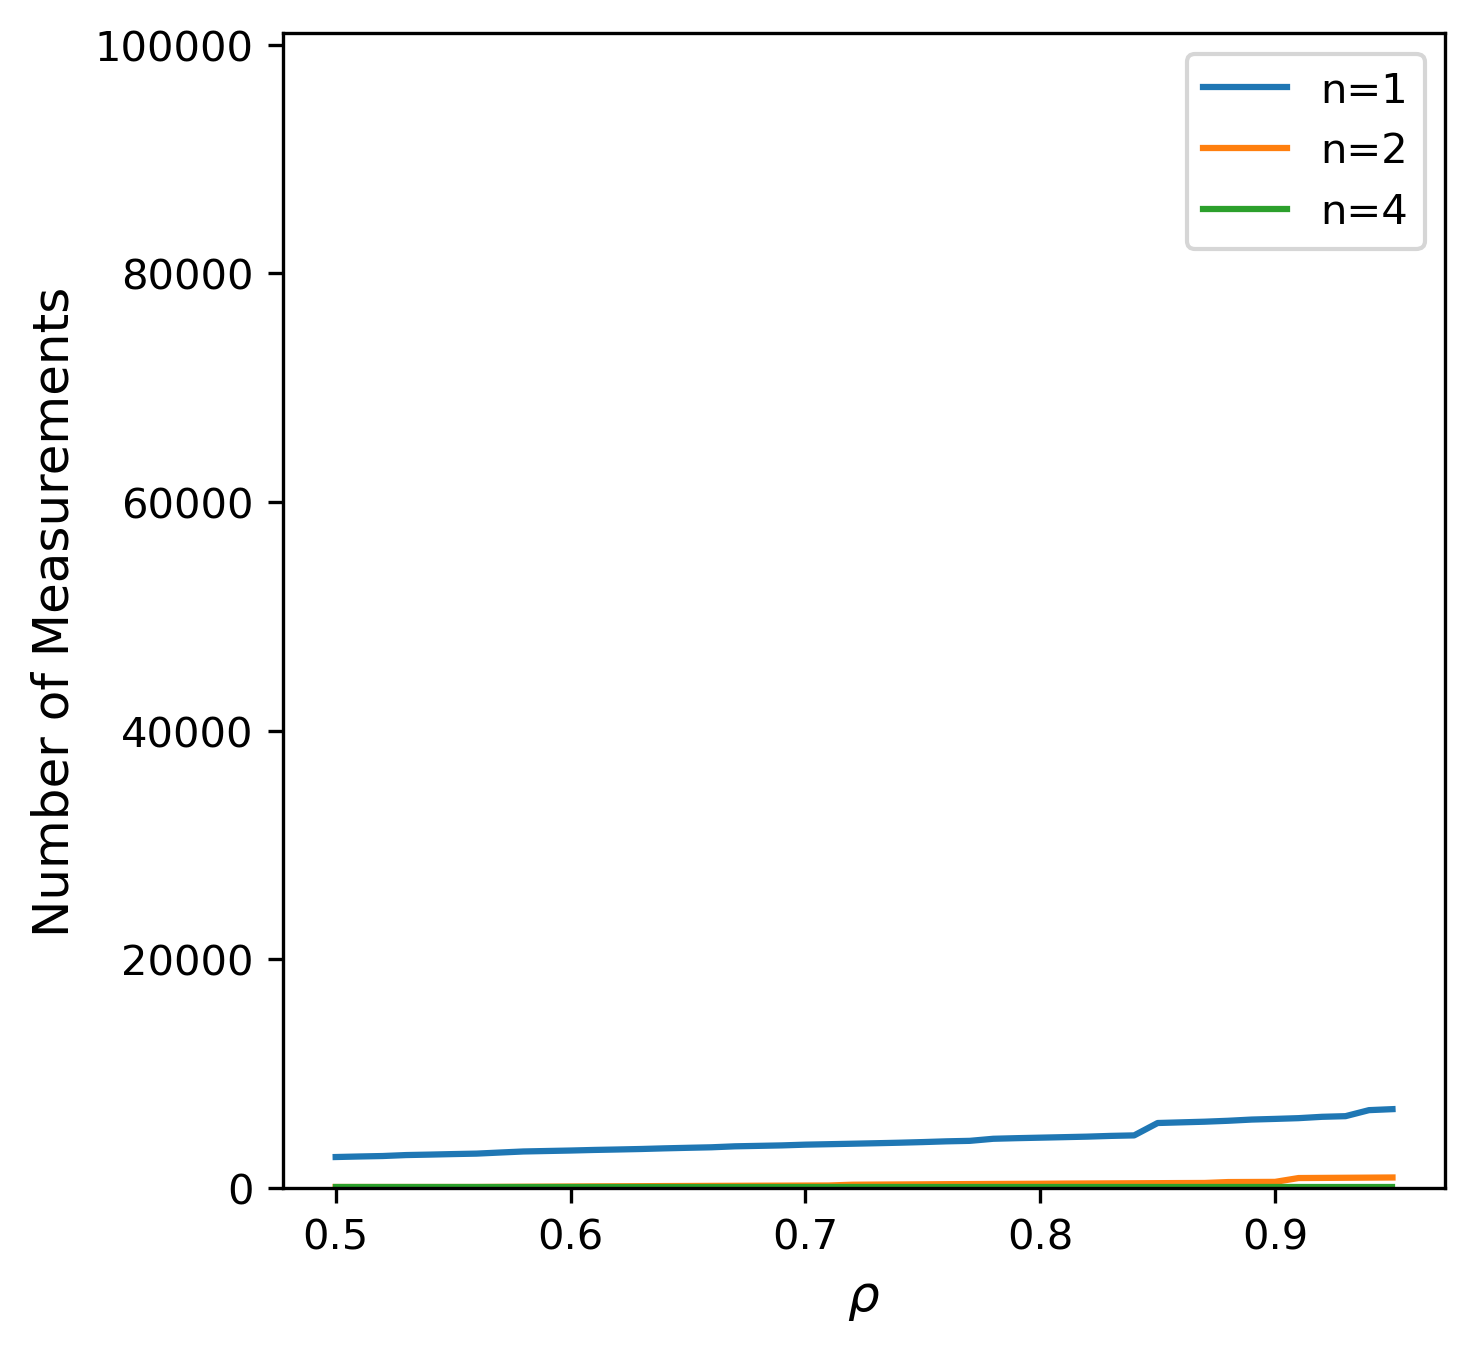

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_H_1], label="n=1")
ax.plot(RHO, [len(l) for l in list_M_H_2], label="n=2")
ax.plot(RHO, [len(l) for l in list_M_H_4], label="n=4")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 101000)
ax.legend()

plt.show()

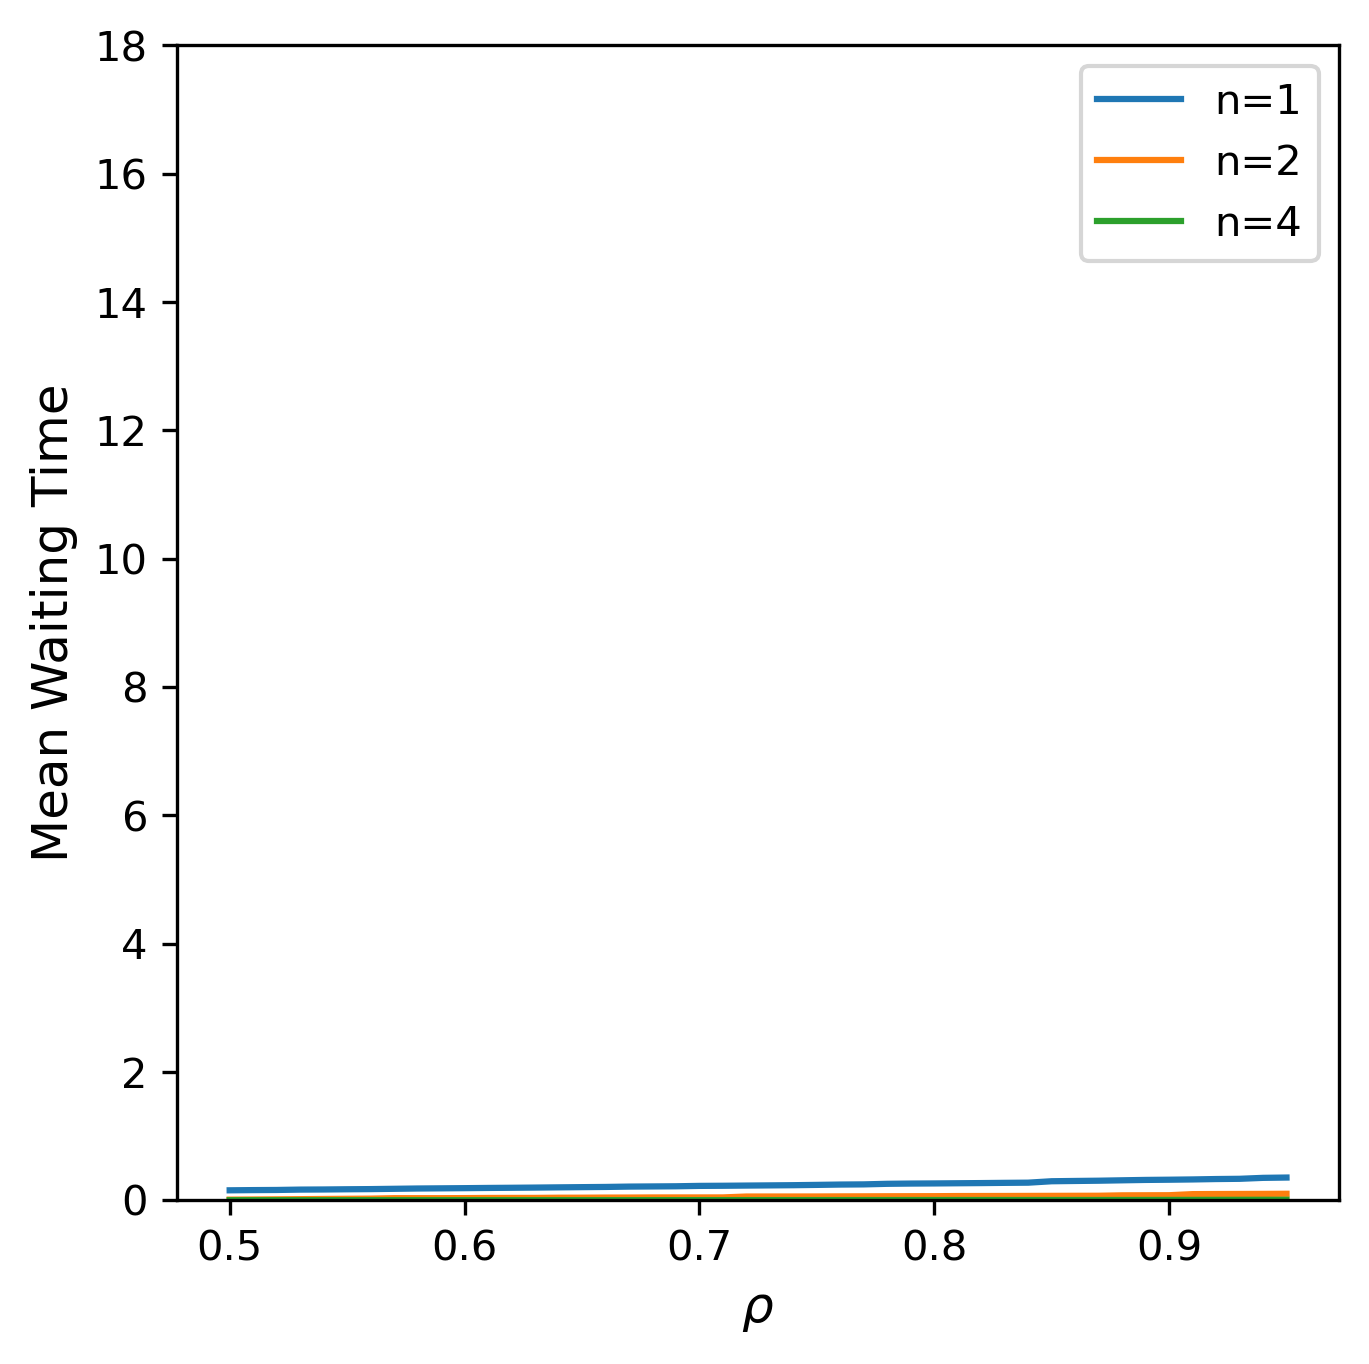

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_H_1, label="n=1")
ax.plot(RHO, means_M_H_2, label="n=2")
ax.plot(RHO, means_M_H_4, label="n=4")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 18)
ax.legend()

plt.show()

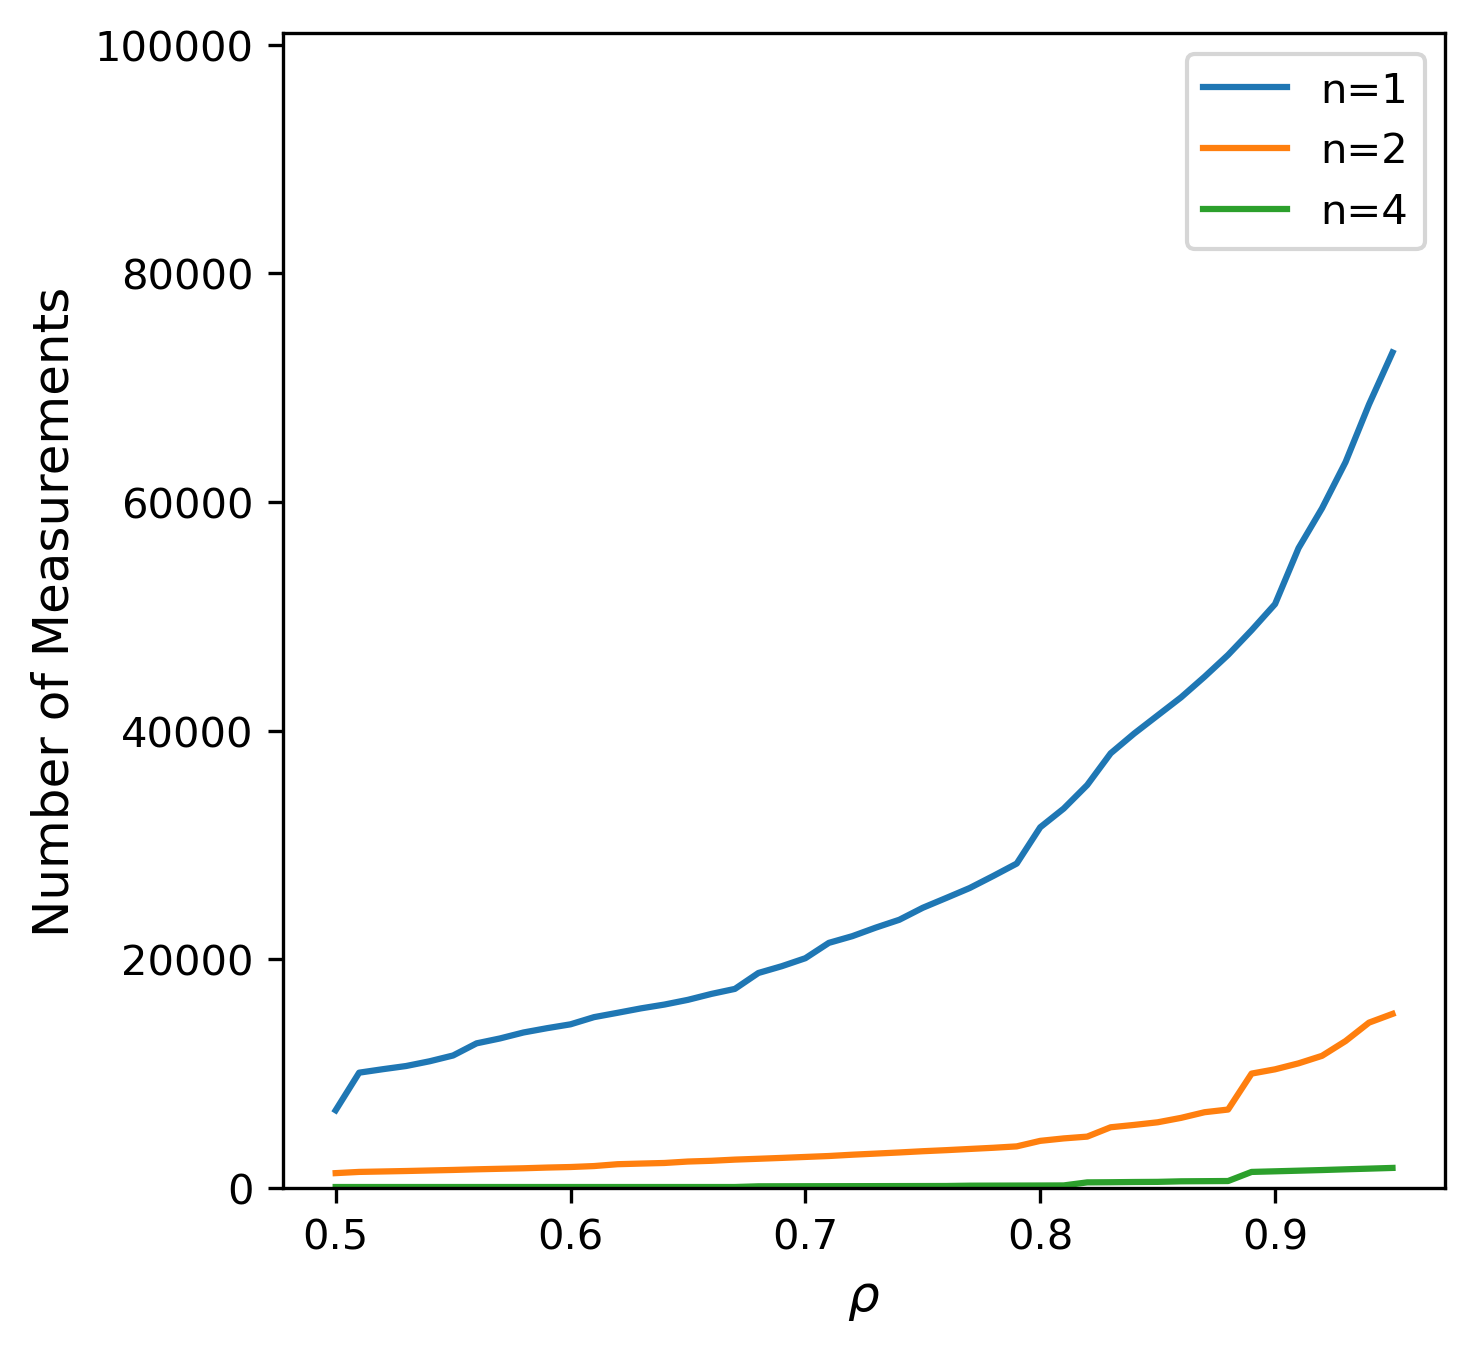

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_H_1_CorrectRate], label="n=1")
ax.plot(RHO, [len(l) for l in list_M_H_2_CorrectRate], label="n=2")
ax.plot(RHO, [len(l) for l in list_M_H_4_CorrectRate], label="n=4")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 101000)
ax.legend()

plt.show()

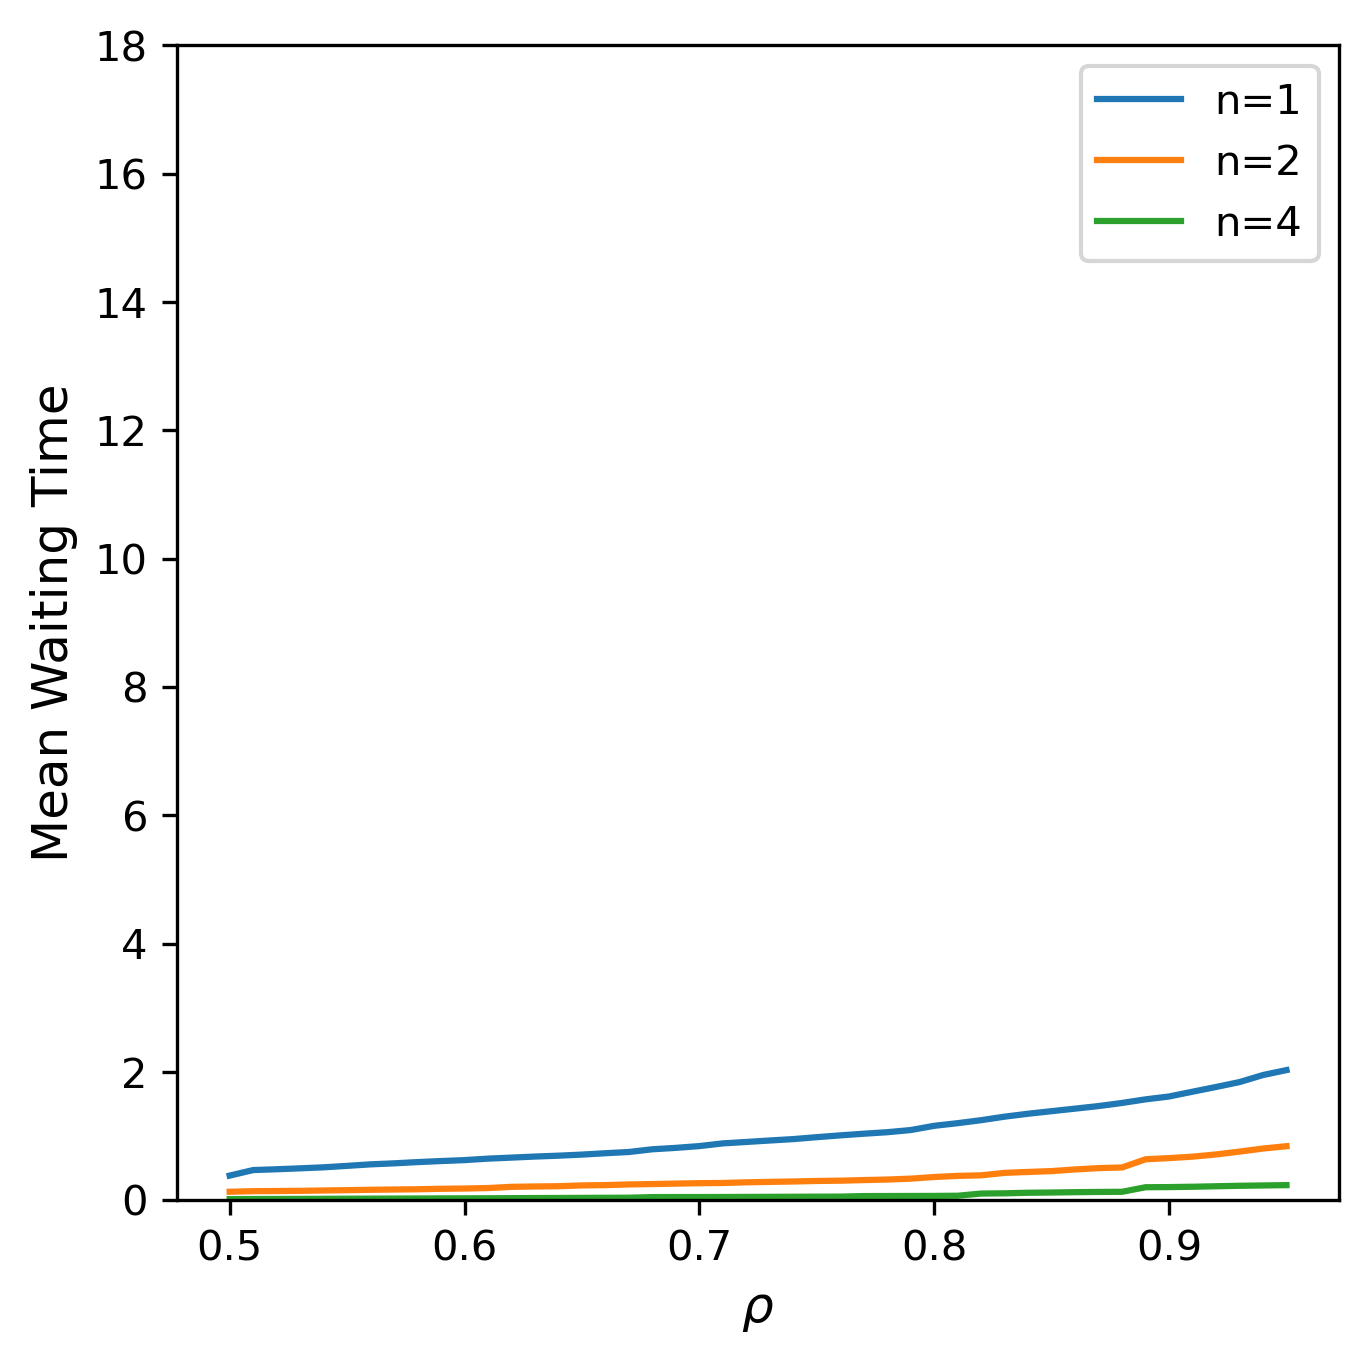

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_H_1_CorrectRate, label="n=1")
ax.plot(RHO, means_M_H_2_CorrectRate, label="n=2")
ax.plot(RHO, means_M_H_4_CorrectRate, label="n=4")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 18)
ax.legend()

plt.show()

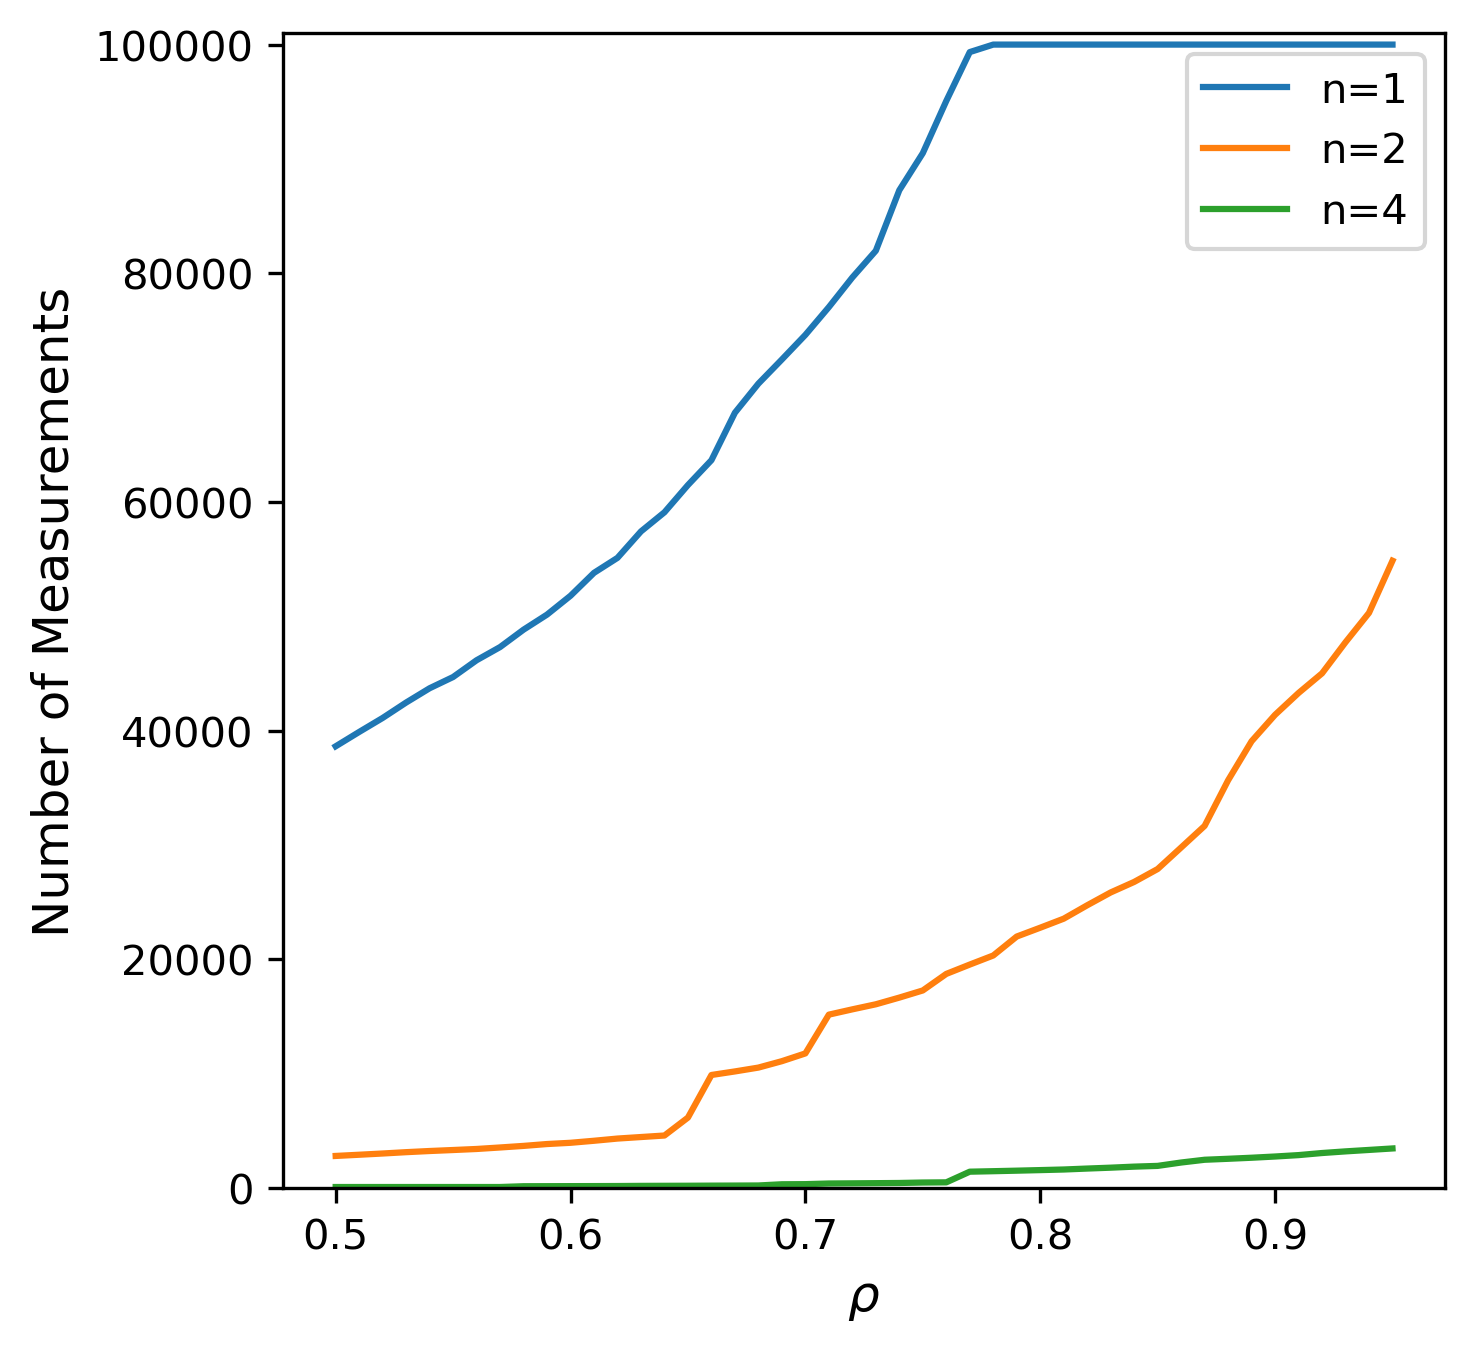

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_H_1_TestRate], label="n=1")
ax.plot(RHO, [len(l) for l in list_M_H_2_TestRate], label="n=2")
ax.plot(RHO, [len(l) for l in list_M_H_4_TestRate], label="n=4")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 101000)
ax.legend()

plt.show()

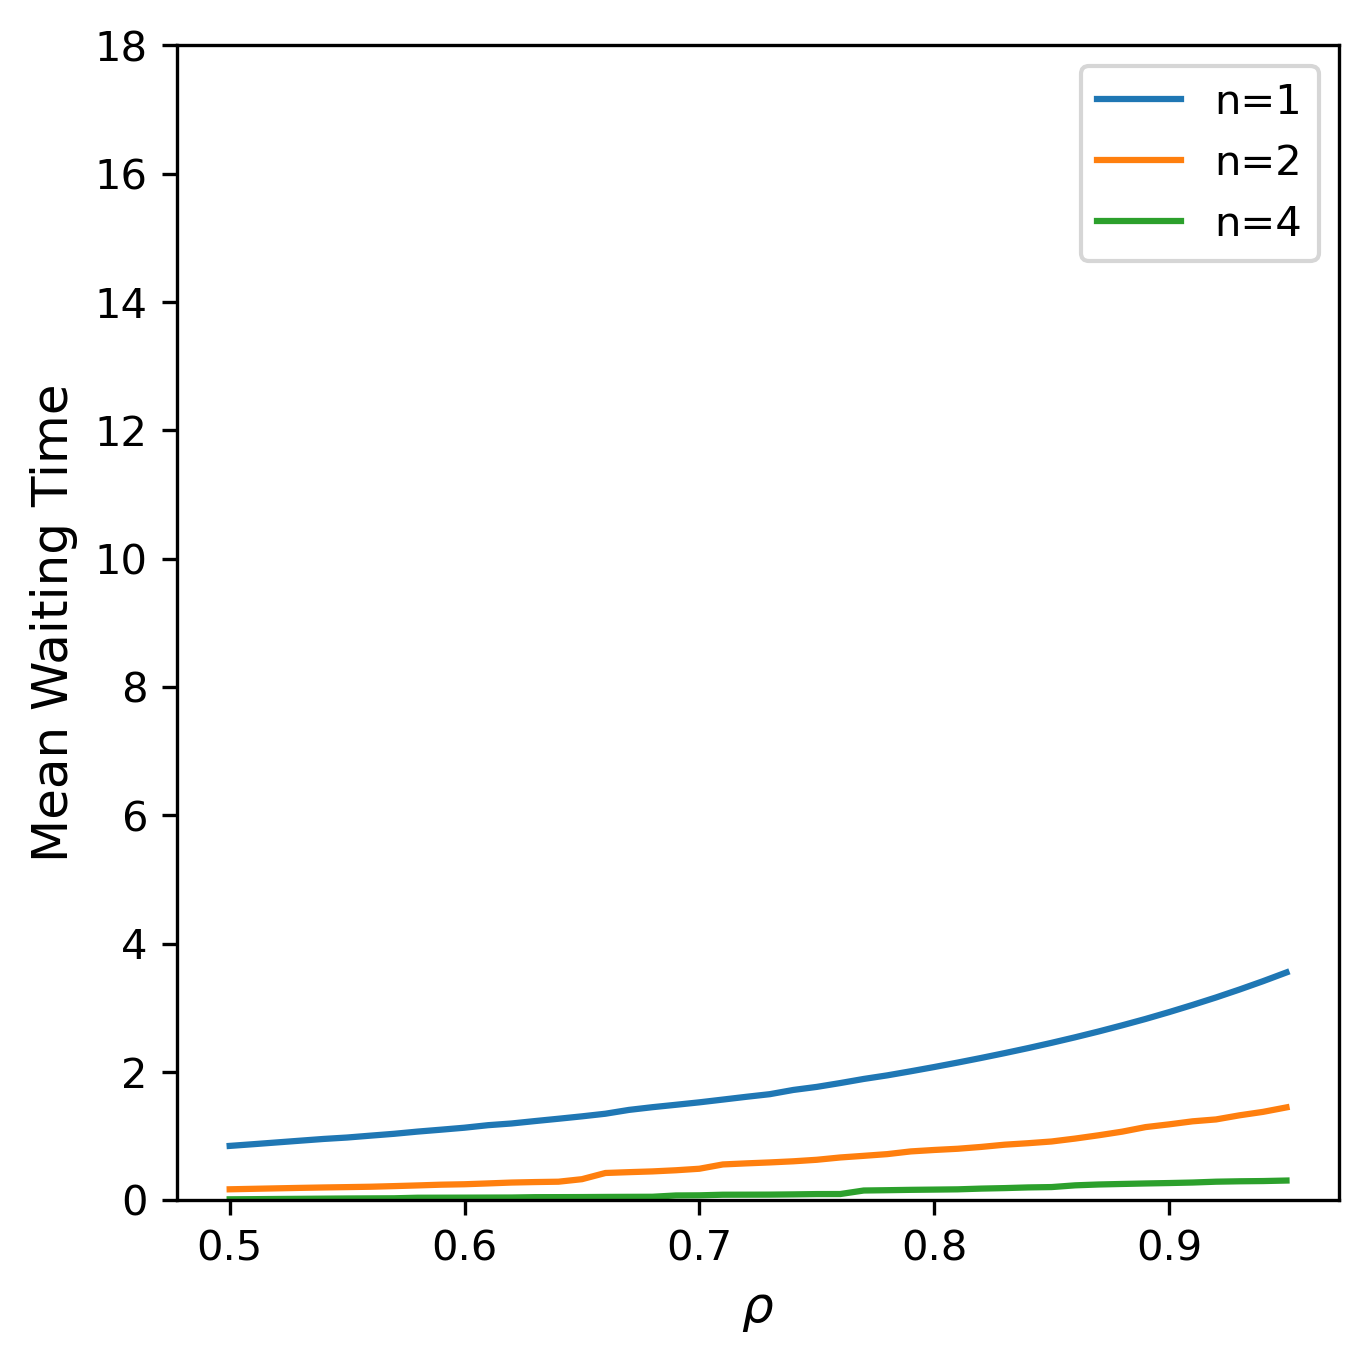

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_H_1_TestRate, label="n=1")
ax.plot(RHO, means_M_H_2_TestRate, label="n=2")
ax.plot(RHO, means_M_H_4_TestRate, label="n=4")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 18)
ax.legend()

plt.show()